In [2]:
import numpy as np
import imageio as imageio
import matplotlib.pyplot as plt
%matplotlib inline

## Initialization

In [11]:
# Load the map
floor_plan = imageio.imread('./map/vivocity.png')
grid_map_img = imageio.imread('./map/vivocity_freespace.png')
grid_map = grid_map_img.transpose()
print("Size of the map:", grid_map.shape)
print("Occupied Cells:", np.count_nonzero(grid_map == 0))
print("Free Cells:", np.count_nonzero(grid_map == 255))

# Map resolution (Constant)
MAP_RES = 0.2 # each cell represents a 0.2m x 0.2m square in reality

# Locations on the map
locations = {'start':  [345, 95],    # Start from the level 2 Escalator
             'snacks': [470, 475],   # Garrett Popcorn
             'store':  [20, 705],    # DJI Store
             'movie':  [940, 545],   # Golden Village
             'food':   [535, 800],   # PUTIEN
            }

# A helper function to mark the locations on the map
def plot_locations(ax, locations: dict, color: 'str'='black'):
    for key, value in locations.items():
        ax.plot(locations[key][0], locations[key][1], marker="o", markersize=10, markeredgecolor="red")
        ax.text(locations[key][0], locations[key][1]-15, s=key, fontsize='x-large', fontweight='bold', c=color, ha='center')
    return

# # Plot the locaitons on the map 
# plt.figure(figsize=(20, 10), dpi=80)
# plt.subplot(1,2,1)
# plt.imshow(floor_plan)
# plot_locations(locations)
# plt.subplot(1,2,2)
# plt.imshow(grid_map_img, cmap='gray')
# plot_locations(locations, color='cyan')
# plt.show()

# # Check if the designated locations are free
# for key, value in locations.items():
#     print(f"Cell {key} is free: {grid_map[value[0], value[1]] == 255}")

# convert locations to tuple format:
for i in locations.keys():
    locations[i] = (locations[i][0], locations[i][1])

Size of the map: (1000, 1000)
Occupied Cells: 823039
Free Cells: 176961


## Task 1

In [36]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        # print(f"create Node")
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

def astar(maze, start, end, ax, i):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # draw current node:
        print(current_node.position[0], current_node.position[1])
        i += 1
        ax[0].plot(current_node.position[0], current_node.position[1], marker="o", markersize=100, markeredgecolor="red")
        ax[1].plot(current_node.position[0], current_node.position[1], marker="o", markersize=100, markeredgecolor="red")
        # ax[1].plot(100,100,marker="o", markersize=100, markeredgecolor="red")


        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 255:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)

    return []

345 95
346 96
347 97
348 98
349 99
350 100
351 101
352 102
353 103
354 103
355 104
356 104
357 104
358 105
359 106
360 107
361 108
362 109
363 110
364 111
365 112
366 113
367 114
368 115
369 116
370 117
371 118
372 119
373 120
374 121
375 122
376 123
377 124
378 125
379 126
380 127
381 128
382 129
383 130
384 131
385 132
386 133
387 134
388 135
389 136
390 137
391 138
392 139
393 140
394 141
395 142
396 143
397 144
398 145
399 146
400 147
401 148
402 149
403 150
404 151
405 152
405 153
405 154
405 155
405 156
405 157
405 158
405 159
405 160
405 161
405 162
405 163
405 164
405 165
405 166
405 167
405 168
405 169
405 170
405 171
405 172
405 173
405 174
405 175
405 176
405 177
405 178
405 179
405 180
405 181
405 182
405 183
405 184
405 185
405 186
405 187
405 188
405 189
405 190
405 191
405 192
405 193
405 194
405 195
405 196
405 197
405 198
405 199
405 200
405 201
405 202
405 203
405 204
405 205
405 206
405 207
405 208
405 209
405 210
405 211
405 212
405 213
405 214
405 215
405 216
405 2

KeyboardInterrupt: 

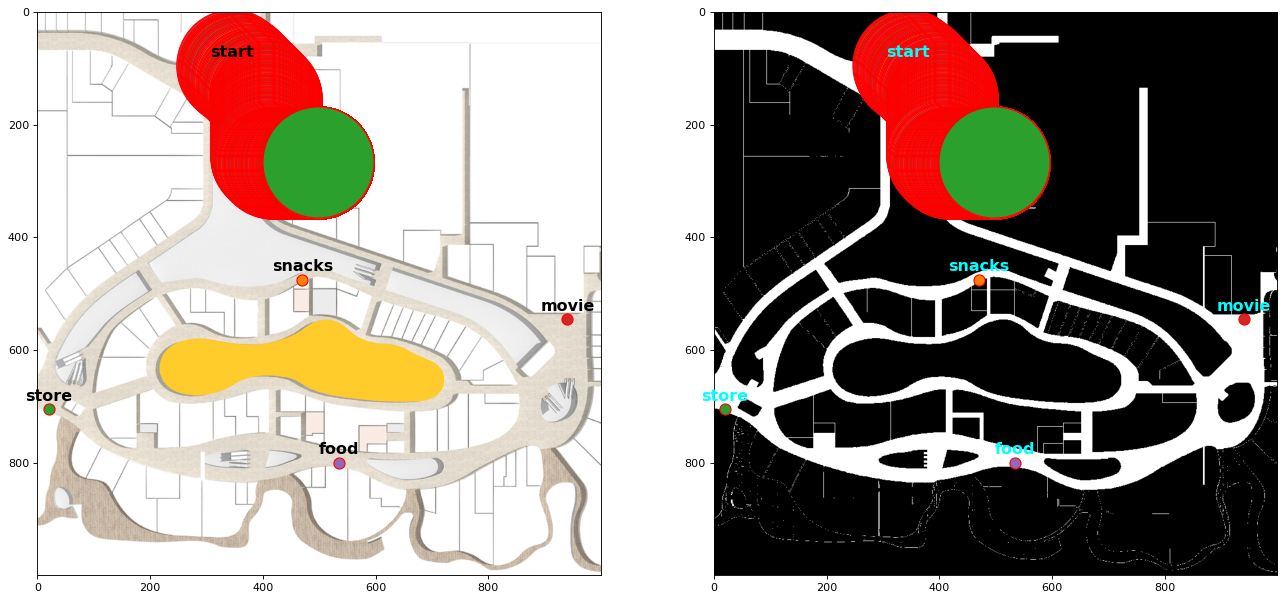

In [37]:
start = locations['start']
end = locations['movie']
fig, ax = plt.subplots(1,2, dpi=80, figsize=(20, 10))
ax[0].imshow(floor_plan)
plot_locations(ax[0], locations)
ax[1].imshow(grid_map_img, cmap='gray')
plot_locations(ax[1], locations, color='cyan')
i = 0
path = astar(grid_map, start, end, ax, i)
path

## Task 2

## Task 3